# Introduction 
The COVID era has come with a deluge of data. While this has been a windfall for data scientists, it also presents them with an opportunity to convey an important message to the population at large. Being particularly concerned with the spread of the disease across my home state, I decided to analyze the data, and visualize it in a way that would help people understand how the spread of the disease has shifted over time, as it has moved from urban areas into farther-flung communities.

# 1 Load Data

## 1.1 Import Libraries
For this project, we will analyse and plot the data using the libraries in the Tidyverse (namely dplyr and ggplot2). We will also use themes from ggthemes.


In [ ]:
#import tidyverse library
library(tidyverse)
library(ggthemes)

## 1.2 Import Data
We will read in two datasets. The first is the county-level Covid dataset regularly updated by the New York Times, and published on their github page. I have also created a csv which contains population data (from Wikipedia) and a region for each county, which I assigned based on an attempt to arganize counties into groups that gave them similar (same order of magnitude) populations.

In [2]:
#read in NYT covid data from github
US_covid <- read.csv("https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv")

In [3]:
#read in csv showing region and population for each county
UT_region_pop <- read.csv("county_region_pop.csv") 

# 2 Data Analysis
## 2.1 Data Filtering and Joining
I will begin by filtering the NYT dataset to only include data from Utah. I will then join this filtered dataframe with the county frame. I will then group by date and region, so that there is only one value for each region and each day. 

In [4]:
#filter for only Utah, and inner join with juris_pop df. rename population to county_pop
UT_covid <- US_covid %>%
    filter(state == "Utah") %>%
    inner_join(UT_region_pop, by = "county")

names(UT_covid)[8] <- "county_pop"
UT_covid$date <- as.POSIXct(UT_covid$date)

In [ ]:
#restructure the df so that there is only one value (sum) for each jursidiction per day
by_region <- UT_covid %>%
    group_by(date, region) %>%
    summarize(cases = sum(cases), deaths = sum(deaths))

# 3 Data Visualization
## 3.1 Absolute Plot
The first plot will be the aboslute plot, which will show the total number of vases in the state since the first case appeared in March 2020. 

In [6]:
abs_plot <- ggplot(by_region, aes(x = date, y = cases, fill = region))+
    geom_area()+
    labs(x = "Date", 
         y = "Number of Cases", 
         title = "Population Proportion \n Proportion of Cases in Utah \n Number of Covid Cases in Utah", 
         legend = "Region", 
         caption = "Source: github.com/nytimes/covid-19-data")+
    theme_few()+
    theme(
        plot.title = element_text(size = 14, hjust = 0.5),
        plot.caption = element_text(size = 10, face = 'italic', color = 'gray80', hjust = 0) 
    )+
    scale_fill_tableau()

ggsave("covid_abs.png", height = 6, width = 10, units = "in")

## 3.2 Proportion Plot
I will next create a stacked area plot, which we will normalize to 1, so that the color shows the the proportion of cases for each region on a day-to-day basis. 

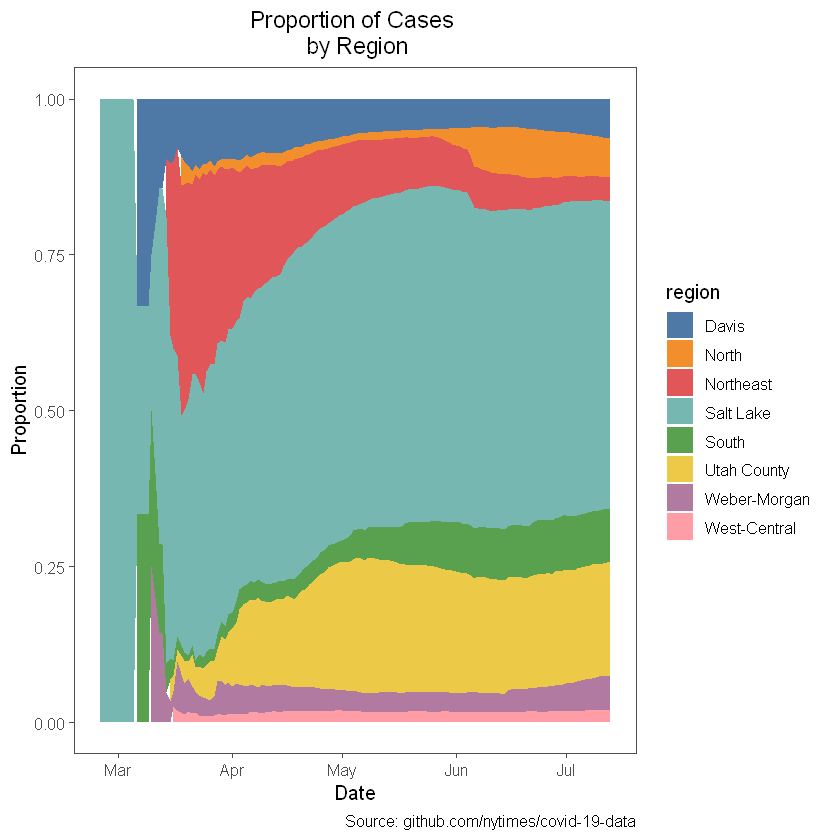

In [7]:
prop_plot <- ggplot(by_region, aes(x = date, y = cases, fill = region))+
    geom_area(stat = 'identity', position = 'fill', aes(fill = region))+
    labs(x = "Date", 
         y = "Proportion", 
         title = "Proportion of Cases \n by Region", 
         legend = "Region", 
         caption = "Source: github.com/nytimes/covid-19-data")+
    theme_few()+
    theme(
        plot.title = element_text(size = 14, hjust = 0.5),
#        plot.caption = element_text(size = 10, face = 'italic', color = 'gray80', hjust = 0) 
    )+
    scale_fill_tableau()

prop_plot

ggsave("covid_proportion.png", height = 6, width = 10, units = "in")

## 3.3 Population Proportion
To provide a point of reference for the proportional case plot, we will also include a simple plot the shows the proportion of the populations of each defined region. We will enetually display this next to the stacked area plot for context. 

In [ ]:
UT_pop_prop <- UT_region_pop %>%
    group_by(region)%>%
    summarize(region_pop = sum(population))

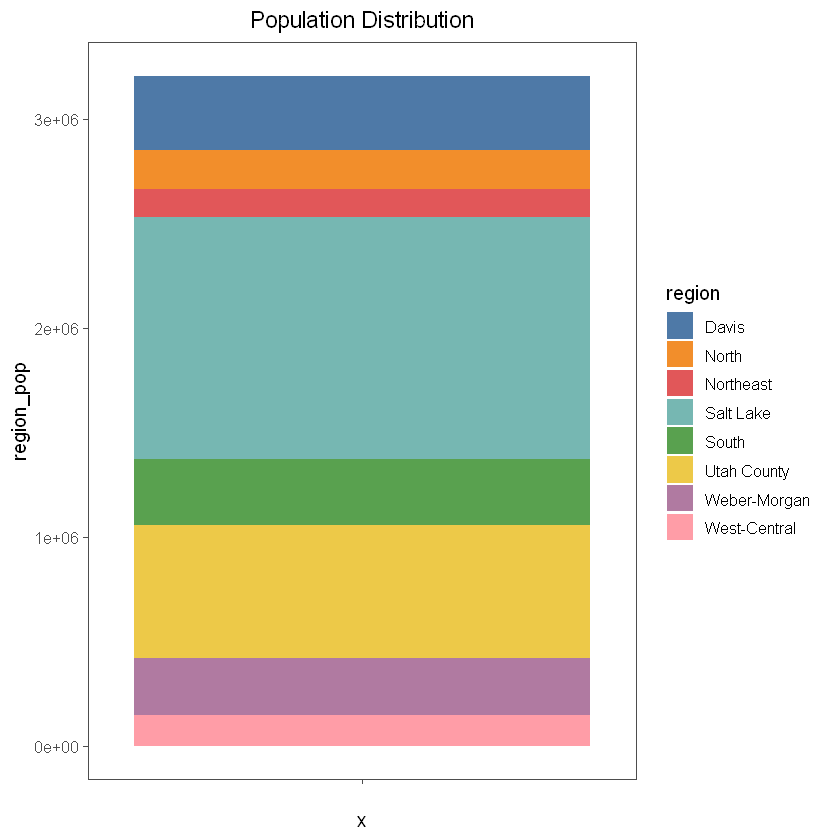

In [9]:
pop_prop_col <- ggplot(UT_pop_prop, aes(x = "", y = region_pop, fill = region))+
    geom_col(width = 1)

pop_prop_col+
    theme_few()+
    labs(title = "Population Distribution")+
    theme(plot.title = element_text(size = 14, hjust = 0.5))+
    scale_fill_tableau()

ggsave("population_proportion.png", height = 6, width = 6, units = "in")

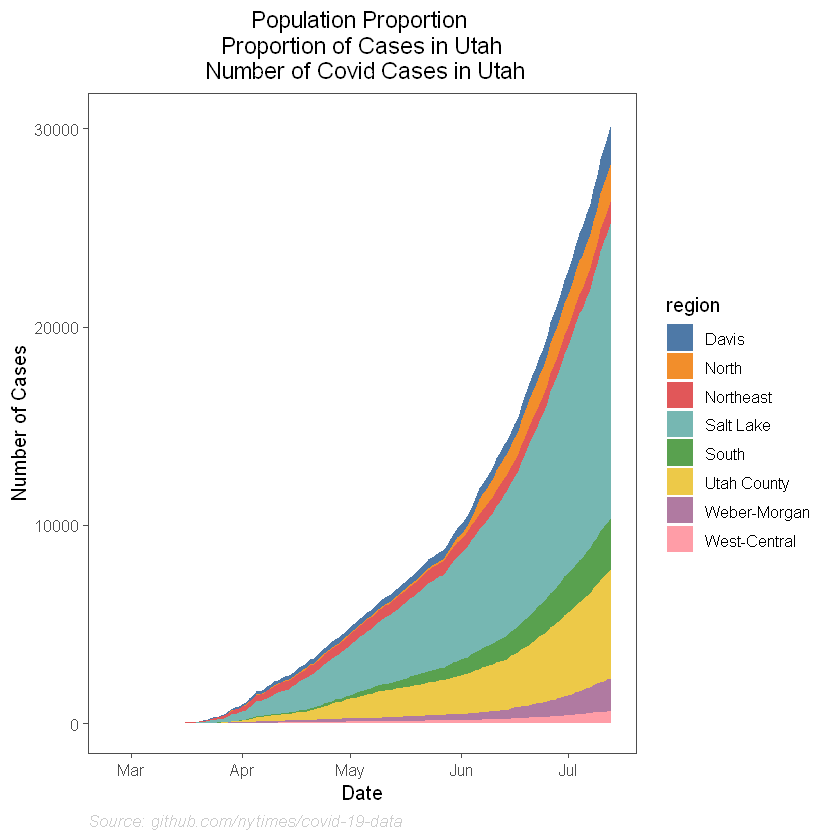

In [10]:
abs_plot